## **Estimación de enfermedades cardiacas**

En el siguiente notebook, se realiza la predicción de enfermedades cardiacas en base a características médicas proporcionadas para cada paciente

Según los CDC, las enfermedades cardíacas son una de las principales causas de muerte en la mayoría de las razas de los Estados Unidos (afroamericanos, indios americanos y nativos de Alaska, y blancos). Aproximadamente la mitad de los estadounidenses (47 %) tienen al menos uno de los tres principales factores de riesgo de enfermedades cardíacas: presión arterial alta, colesterol alto y tabaquismo. Otros indicadores clave incluyen el estado de diabetes, la obesidad (IMC alto), no realizar suficiente actividad física o beber demasiado alcohol. Identificar y prevenir los factores que tienen el mayor impacto en las enfermedades cardíacas es muy importante en la atención médica. A su vez, los avances en informática permiten la aplicación de métodos de aprendizaje automático para detectar "patrones" en los datos que pueden predecir la condición de un paciente.

Dataset disponible en: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

### **1. Importación de los datos**

In [1]:
# importar librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# herramientas
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
# escalamiento y normalizacion
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
# imputers
from sklearn.impute import SimpleImputer
# metricas
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
# mejoras
from sklearn.model_selection import GridSearchCV
# deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# datos
df = pd.read_csv('heart_2022.csv')
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

### **2. Exploración y limpieza de los datos**

En esta sección se realiza una exploración de los datos. Se busca identificar los tipos de datos presentes y también detectar la presencia de valores nulos, con el objetivo de elegir una técnica de imputación adecuada en caso de ser necesaria.

In [3]:
# dataset
df.head(5).T

,0,1,2,3,4
State,Alabama,Alabama,Alabama,Alabama,Alabama
Sex,Female,Male,Male,Female,Female
GeneralHealth,Very good,Very good,Very good,Fair,Good
PhysicalHealthDays,4.0,0.0,0.0,5.0,3.0
MentalHealthDays,0.0,0.0,0.0,0.0,15.0
LastCheckupTime,Within past year (anytime less than 12 months ...,Within past year (anytime less than 12 months ...,Within past year (anytime less than 12 months ...,Within past year (anytime less than 12 months ...,Within past year (anytime less than 12 months ...
PhysicalActivities,Yes,Yes,No,Yes,Yes
SleepHours,9.0,6.0,8.0,9.0,5.0
RemovedTeeth,None of them,None of them,"6 or more, but not all",None of them,1 to 5
HadHeartAttack,No,No,No,No,No


In [4]:
# datos
df.shape

(246022, 40)

El dataset cuenta con 246.022 filas y 40 columnas. 

In [5]:
# info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

Se observa que el dataset contiene bastantes datos, principalmente del tipo "object", los cuales son 34 datos. Tambien cuenta con datos del tipo float, pero en menor proporcion, ya que se cuenta con 6 datos de este tipo.

In [6]:
# estadisticas
print("Estadistica descriptiva del dataset")
df.describe()

Estadistica descriptiva del dataset


,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


In [7]:
# tipos de datos
df.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
C

Como se cuenta con una gran cantidad de datos categoricos, a continuación se analizan los valores unicos en dichas columnas.

In [8]:
# extraer las columnas tipo object
object_columns = df.select_dtypes(include=['object'])

# identificar sus valores unicos 
for column in object_columns:
    unique_values = object_columns[column].unique()
    print(f"Columna '{column}': {unique_values}")

Columna 'State': ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
Columna 'Sex': ['Female' 'Male']
Columna 'GeneralHealth': ['Very good' 'Fair' 'Good' 'Excellent' 'Poor']
Columna 'LastCheckupTime': ['Within past year (anytime less than 12 months ago)'
 '5 or more years ago'
 'Within past 2 years (1 year but less than 2 years ago)'
 'Within past 5 years (2 years but less than 5 years ago)']
Columna 'Phy

Se logra identificar que una gran cantidad de columnas tienen un comportamiento binario, ya que representan la presencia o ausencia de una condición mediante yes o no.

In [9]:
# ver solo yes o no
for column in object_columns:
    unique_values = df[column].unique()
    if 'Yes' in unique_values and 'No' in unique_values:
        print(f"Columna '{column}' tiene los valores únicos: {unique_values}")

Columna 'PhysicalActivities' tiene los valores únicos: ['Yes' 'No']
Columna 'HadHeartAttack' tiene los valores únicos: ['No' 'Yes']
Columna 'HadAngina' tiene los valores únicos: ['No' 'Yes']
Columna 'HadStroke' tiene los valores únicos: ['No' 'Yes']
Columna 'HadAsthma' tiene los valores únicos: ['No' 'Yes']
Columna 'HadSkinCancer' tiene los valores únicos: ['No' 'Yes']
Columna 'HadCOPD' tiene los valores únicos: ['No' 'Yes']
Columna 'HadDepressiveDisorder' tiene los valores únicos: ['No' 'Yes']
Columna 'HadKidneyDisease' tiene los valores únicos: ['No' 'Yes']
Columna 'HadArthritis' tiene los valores únicos: ['Yes' 'No']
Columna 'HadDiabetes' tiene los valores únicos: ['No' 'Yes' 'Yes, but only during pregnancy (female)'
 'No, pre-diabetes or borderline diabetes']
Columna 'DeafOrHardOfHearing' tiene los valores únicos: ['No' 'Yes']
Columna 'BlindOrVisionDifficulty' tiene los valores únicos: ['No' 'Yes']
Columna 'DifficultyConcentrating' tiene los valores únicos: ['No' 'Yes']
Columna 'Di

Al tener una gran cantidad de columnas categoricas, pueden presentarse inconsistencias entre las palabras. En busca de que las columnas categóricas sean consistentes, las columnas con estos datos serán convertidas todas a minúsculas.

In [10]:
# convertir a minusculas
for column in object_columns:
    df[column] = df[column].str.lower()
    unique_values = df[column].unique()
    print(f"Columna '{column}': {unique_values}")

Columna 'State': ['alabama' 'alaska' 'arizona' 'arkansas' 'california' 'colorado'
 'connecticut' 'delaware' 'district of columbia' 'florida' 'georgia'
 'hawaii' 'idaho' 'illinois' 'indiana' 'iowa' 'kansas' 'kentucky'
 'louisiana' 'maine' 'maryland' 'massachusetts' 'michigan' 'minnesota'
 'mississippi' 'missouri' 'montana' 'nebraska' 'nevada' 'new hampshire'
 'new jersey' 'new mexico' 'new york' 'north carolina' 'north dakota'
 'ohio' 'oklahoma' 'oregon' 'pennsylvania' 'rhode island' 'south carolina'
 'south dakota' 'tennessee' 'texas' 'utah' 'vermont' 'virginia'
 'washington' 'west virginia' 'wisconsin' 'wyoming' 'guam' 'puerto rico'
 'virgin islands']
Columna 'Sex': ['female' 'male']
Columna 'GeneralHealth': ['very good' 'fair' 'good' 'excellent' 'poor']
Columna 'LastCheckupTime': ['within past year (anytime less than 12 months ago)'
 '5 or more years ago'
 'within past 2 years (1 year but less than 2 years ago)'
 'within past 5 years (2 years but less than 5 years ago)']
Columna 'Phy

A continuación se analizan los datos faltantes en el dataset y se buscan métodos para rellenarlos en caso de ser necesario.

In [11]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
State,246022,0,0.0
Sex,246022,0,0.0
DifficultyWalking,246022,0,0.0
DifficultyDressingBathing,246022,0,0.0
DifficultyErrands,246022,0,0.0
SmokerStatus,246022,0,0.0
ECigaretteUsage,246022,0,0.0
ChestScan,246022,0,0.0
RaceEthnicityCategory,246022,0,0.0
AgeCategory,246022,0,0.0


El dataset no contiene bastantes datos faltantes.

Se procede a visualizar la distribución de los datos.

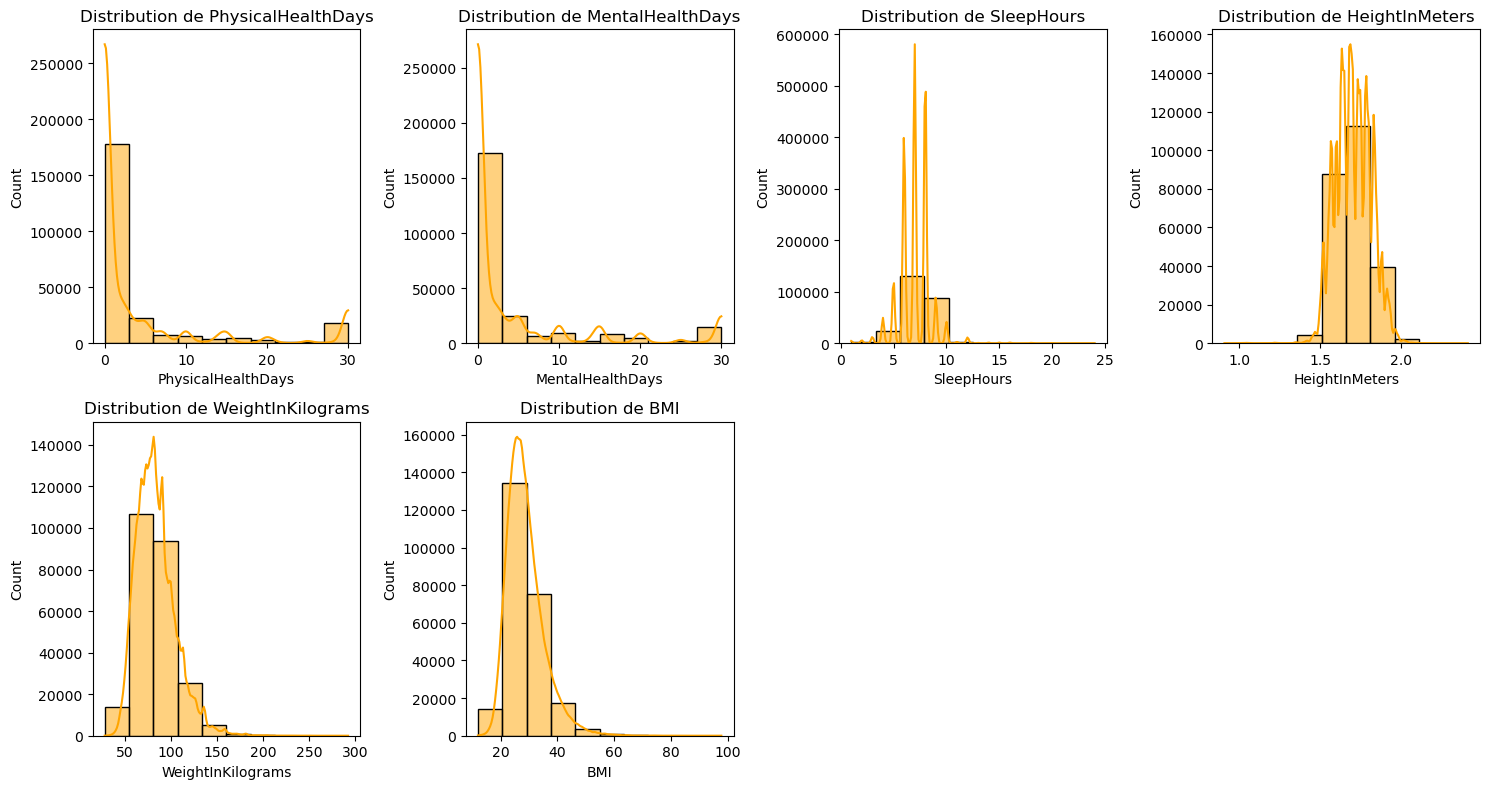

In [12]:
# numericas
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# numero de columnas y filas
cols = 4
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

# distribucion de los datos
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i) 
    sns.histplot(df[col], kde=True, color="orange", bins=10)  
    plt.title(f"Distribution de {col}")
    plt.tight_layout()

plt.show()

Tambien se procede a visualizar los boxplots para las variables numericas.

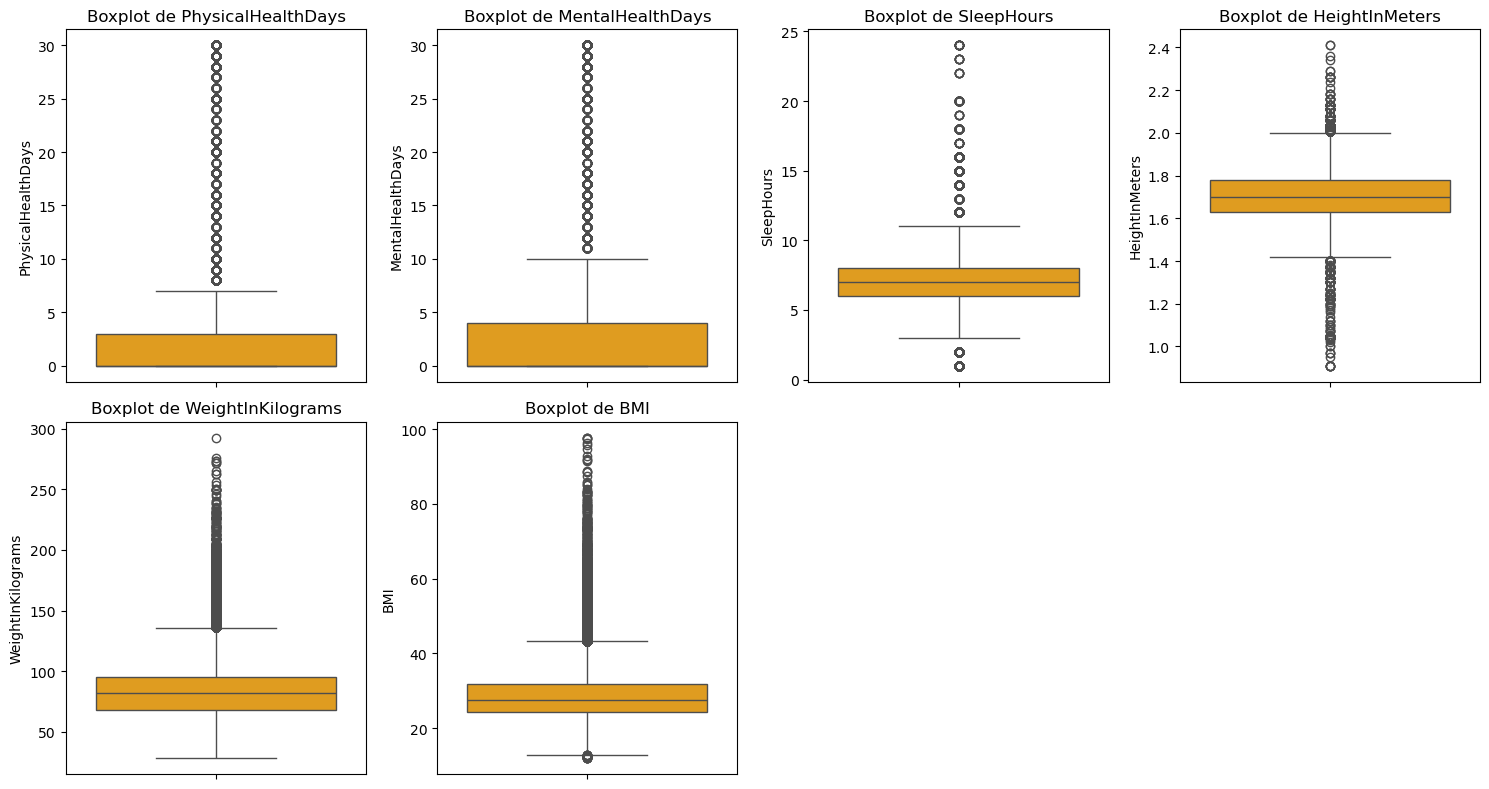

In [13]:
# numericas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# numero de columnas y filas
cols = 4
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

# crear boxplots 
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i) 
    sns.boxplot(y=df[col], color="orange")
    plt.title(f"Boxplot de {col}")
    plt.tight_layout()

plt.show()

Se observa que hay outliers en las columnas del tipo numerico. 

Se transfoman las variables del tipo categoricas que tienen comportamiento binario se convierten a binarios, con 1 indicando presencia o afirmación y 0 en el caso contrario.

In [14]:
# columnas binarias
binary_columns = [
    'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer',
    'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
    'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
    'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing',
    'DifficultyErrands', 'ChestScan', 'AlcoholDrinkers', 'HIVTesting',
    'FluVaxLast12', 'PneumoVaxEver', 'HighRiskLastYear', 'CovidPos'
]

# mapear valores
binary_mapping = {
    'yes': 1,
    'no': 0,
    'no, pre-diabetes or borderline diabetes': 0, # no
    'yes, but only during pregnancy (female)': 1,  # yes
    'tested positive using home test without a health professional': 1  # yes
}

# transformar
for col in binary_columns:
    df[col] = df[col].map(binary_mapping)  

In [15]:
# df
df.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                 int64
HadAngina                      int64
HadStroke                      int64
HadAsthma                      int64
HadSkinCancer                  int64
HadCOPD                        int64
HadDepressiveDisorder          int64
HadKidneyDisease               int64
HadArthritis                   int64
HadDiabetes                    int64
DeafOrHardOfHearing            int64
BlindOrVisionDifficulty        int64
DifficultyConcentrating        int64
DifficultyWalking              int64
DifficultyDressingBathing      int64
DifficultyErrands              int64
SmokerStatus                  object
ECigaretteUsage               object
C

Se extraen las columnas categóricas restantes.

In [16]:
# extraer las columnas tipo object
object_columns = df.select_dtypes(include=['object'])

# identificar sus valores unicos 
for column in object_columns:
    unique_values = object_columns[column].unique()
    print(f"Columna '{column}': {unique_values}")

Columna 'State': ['alabama' 'alaska' 'arizona' 'arkansas' 'california' 'colorado'
 'connecticut' 'delaware' 'district of columbia' 'florida' 'georgia'
 'hawaii' 'idaho' 'illinois' 'indiana' 'iowa' 'kansas' 'kentucky'
 'louisiana' 'maine' 'maryland' 'massachusetts' 'michigan' 'minnesota'
 'mississippi' 'missouri' 'montana' 'nebraska' 'nevada' 'new hampshire'
 'new jersey' 'new mexico' 'new york' 'north carolina' 'north dakota'
 'ohio' 'oklahoma' 'oregon' 'pennsylvania' 'rhode island' 'south carolina'
 'south dakota' 'tennessee' 'texas' 'utah' 'vermont' 'virginia'
 'washington' 'west virginia' 'wisconsin' 'wyoming' 'guam' 'puerto rico'
 'virgin islands']
Columna 'Sex': ['female' 'male']
Columna 'GeneralHealth': ['very good' 'fair' 'good' 'excellent' 'poor']
Columna 'LastCheckupTime': ['within past year (anytime less than 12 months ago)'
 '5 or more years ago'
 'within past 2 years (1 year but less than 2 years ago)'
 'within past 5 years (2 years but less than 5 years ago)']
Columna 'Phy

Con las columnas categóricas restantes se hace lo mismo. Sin embargo, con las variables que tienen mas de un valor se les asigna variables extras. Por ejemplo, la columna LastCheckUpTime: '5 or more years ago': 0, 'within past 5 years (2 years but less than 5 years ago)': 1, 'within past 2 years (1 year but less than 2 years ago)': 2, within past year (anytime less than 12 months ago)': 3

In [17]:
# Diccionarios para mapeo personalizado
mapping_dict = {
    'Sex': {'female': 0, 'male': 1},
    'GeneralHealth': {'poor': 0, 'fair': 1, 'good': 2, 'very good': 3, 'excellent': 4},
    'LastCheckupTime': {
        '5 or more years ago': 0, 
        'within past 5 years (2 years but less than 5 years ago)': 1,
        'within past 2 years (1 year but less than 2 years ago)': 2, 
        'within past year (anytime less than 12 months ago)': 3
    },
    'PhysicalActivities': {'no': 0, 'yes': 1},
    'RemovedTeeth': {'none of them': 0, '1 to 5': 1, '6 or more, but not all': 2, 'all': 3},
    'SmokerStatus': {
        'never smoked': 0, 
        'former smoker': 1,
        'current smoker - now smokes some days': 2, 
        'current smoker - now smokes every day': 3
    },
    'ECigaretteUsage': {
        'never used e-cigarettes in my entire life': 0, 
        'not at all (right now)': 1,
        'use them some days': 2, 
        'use them every day': 3
    },
    'RaceEthnicityCategory': {
        'white only, non-hispanic': 0, 
        'black only, non-hispanic': 1, 
        'hispanic': 2, 
        'other race only, non-hispanic': 3,
        'multiracial, non-hispanic': 4
    },
    'AgeCategory': {
        'age 18 to 24': 0, 'age 25 to 29': 1, 'age 30 to 34': 2, 'age 35 to 39': 3,
        'age 40 to 44': 4, 'age 45 to 49': 5, 'age 50 to 54': 6, 'age 55 to 59': 7,
        'age 60 to 64': 8, 'age 65 to 69': 9, 'age 70 to 74': 10, 'age 75 to 79': 11,
        'age 80 or older': 12
    },
    'TetanusLast10Tdap': {
        'no, did not receive any tetanus shot in the past 10 years': 0,
        'yes, received tetanus shot but not sure what type': 1, 
        'yes, received tetanus shot, but not tdap': 2,
        'yes, received tdap': 3
    }
}

# transformar
for column, mapping in mapping_dict.items():
    # Registrar valores no mapeados
    unmatched_values = df[~df[column].isin(mapping.keys())][column].unique()
    if len(unmatched_values) > 0:
        print(f"Valores no mapeados en '{column}': {unmatched_values}")
    
    # Aplicar mapeo
    df[column] = df[column].map(mapping)


In [18]:
# df
df.dtypes

State                         object
Sex                            int64
GeneralHealth                  int64
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime                int64
PhysicalActivities             int64
SleepHours                   float64
RemovedTeeth                   int64
HadHeartAttack                 int64
HadAngina                      int64
HadStroke                      int64
HadAsthma                      int64
HadSkinCancer                  int64
HadCOPD                        int64
HadDepressiveDisorder          int64
HadKidneyDisease               int64
HadArthritis                   int64
HadDiabetes                    int64
DeafOrHardOfHearing            int64
BlindOrVisionDifficulty        int64
DifficultyConcentrating        int64
DifficultyWalking              int64
DifficultyDressingBathing      int64
DifficultyErrands              int64
SmokerStatus                   int64
ECigaretteUsage                int64
C

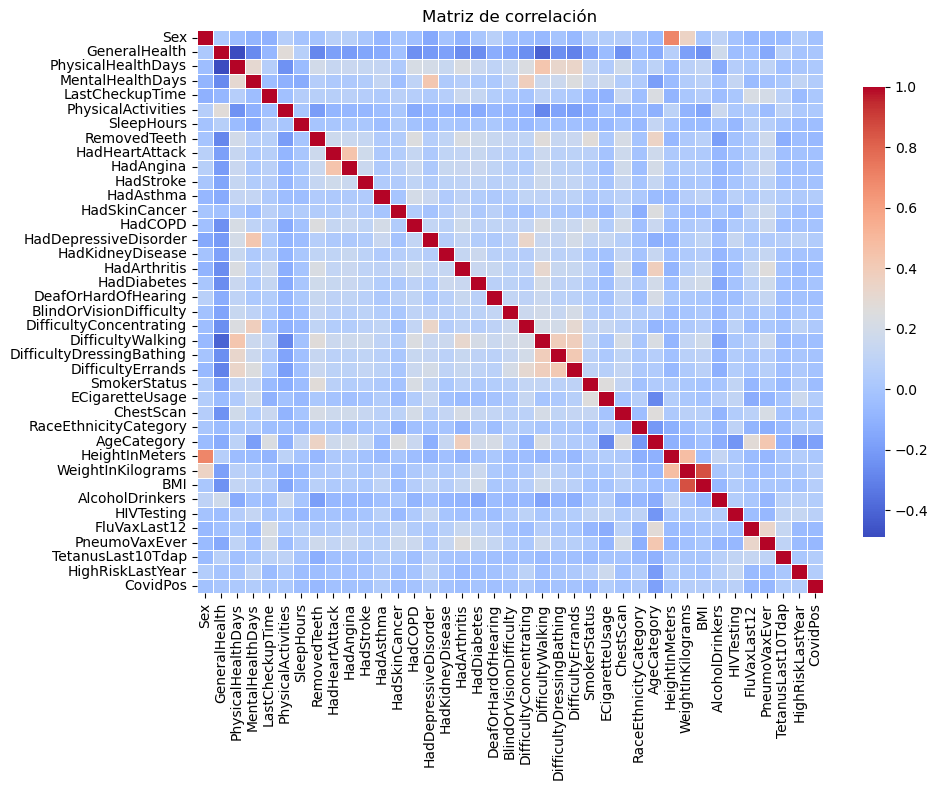

In [19]:
# variables numéricas
numerical_columns = df.select_dtypes(include=['int','float'])

# matriz de correlación
correlation_matrix = numerical_columns.corr()

# mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='white', cbar_kws={"shrink": .8})
plt.title('Matriz de correlación')

# mostrar el grafico
plt.tight_layout()
plt.show()

Se observan correlaciones entre las variables, algunas más interesantes que otras pero de cierta forma todas se relacionan con la variable target (HadHeartDisease)

### **3. Preprocesamiento y modelado de los datos**

El objetivo es aplicar un modelo MLP a los datos utilizando dropout para regularizar la red y early stopping para detener el entrenamiento cuando el rendimiento en el conjunto de validación deje de mejorar

Se realiza el preprocesamiento de los datos para luego ser utilizados en modelos.

In [20]:
#df
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [21]:
# df
df.head(5)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,alabama,0,3,4.0,0.0,3,1,9.0,0,0,...,1.60,71.67,27.99,0,0,1,1,3,0,0
1,alabama,1,3,0.0,0.0,3,1,6.0,0,0,...,1.78,95.25,30.13,0,0,1,1,1,0,0
2,alabama,1,3,0.0,0.0,3,0,8.0,2,0,...,1.85,108.86,31.66,1,0,0,1,0,0,1
3,alabama,0,1,5.0,0.0,3,1,9.0,0,0,...,1.70,90.72,31.32,0,0,1,1,0,0,1
4,alabama,0,2,3.0,15.0,3,1,5.0,1,0,...,1.55,79.38,33.07,0,0,1,1,0,0,0


Se eligen como variable target a HadHeartAttack y las demas columnas seran utlilizadas como predictoras.

In [22]:
# variables categoricas y target
x = df.drop(columns=['HadHeartAttack'])  
y = df[['HadHeartAttack']]

In [23]:
# extraer columnas
numerical_features = x.select_dtypes(include=['int', 'float']).columns
categorical_features =x.select_dtypes(include=['object']).columns

# verificar
print("Features numericas: ", numerical_features)
print("Features categoricas: ", categorical_features)

Features numericas:  Index(['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')
Features categoricas:  Index(['State'], dtype='object')


In [24]:
# transformadores para cada subconjunto de columnas
# numerico
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# categorico
categoric_transformer =  Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [25]:
# crear columntransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),  
        ('cat', categoric_transformer, categorical_features)  
    ]
)

Dividir los datos en un conjunto de entrenamiento y prueba.

In [26]:
# split del dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Se verifica la distribucion de los datos en cada conjunto.

In [27]:
# dist en df
print("Distribución de HadHeartAttack en el dataset original:")
print(y['HadHeartAttack'].value_counts(normalize=True))

# dist en test
print("\nDistribución de HadHeartAttack en el conjunto de entrenamiento:")
print(y_train['HadHeartAttack'].value_counts(normalize=True))

# dist en train
print("\nDistribución de HadHeartAttack en el conjunto de prueba:")
print(y_test['HadHeartAttack'].value_counts(normalize=True))


Distribución de HadHeartAttack en el dataset original:
HadHeartAttack
0    0.945391
1    0.054609
Name: proportion, dtype: float64

Distribución de HadHeartAttack en el conjunto de entrenamiento:
HadHeartAttack
0    0.945202
1    0.054798
Name: proportion, dtype: float64

Distribución de HadHeartAttack en el conjunto de prueba:
HadHeartAttack
0    0.945832
1    0.054168
Name: proportion, dtype: float64


Primeramente, se aplica el modelo MLP sin early stopping.

In [28]:
# modelo MLP
model_mlp = MLPClassifier(hidden_layer_sizes=(100, 50), 
                        activation='relu', 
                        max_iter=300, 
                        random_state=42)

In [29]:
# pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model_mlp)
])

In [30]:
# entrenar el modelo
model_pipeline.fit(x_train, y_train.values.ravel())

c:\Users\Admin\miniconda3\envs\deep_learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer',...
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['State'], dtype='object'))])),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300,
                               random_state=42))])

In [31]:
# predecir en el conjunto de prueba
y_pred = model_pipeline.predict(x_test)

In [32]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.9214166677957375
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     69809
           1       0.29      0.31      0.30      3998

    accuracy                           0.92     73807
   macro avg       0.63      0.63      0.63     73807
weighted avg       0.92      0.92      0.92     73807



In [33]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[66753  3056]
 [ 2744  1254]]


In [34]:
# funcion para graficar la matriz de confusion
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Etiqueta predicha')
    plt.show()

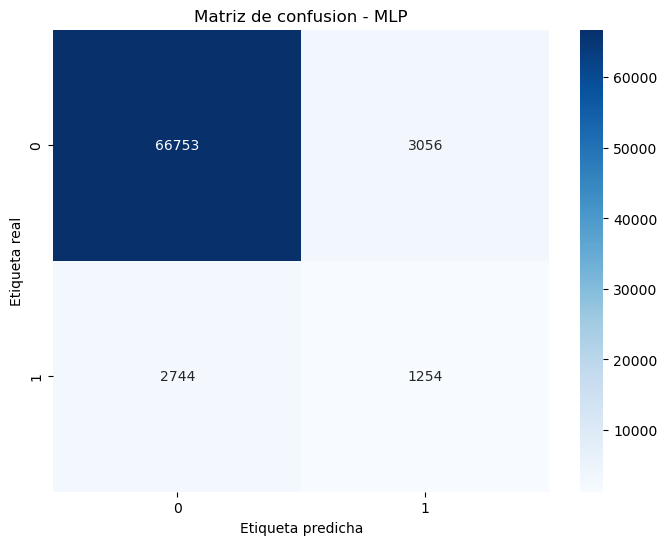

In [35]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - MLP")

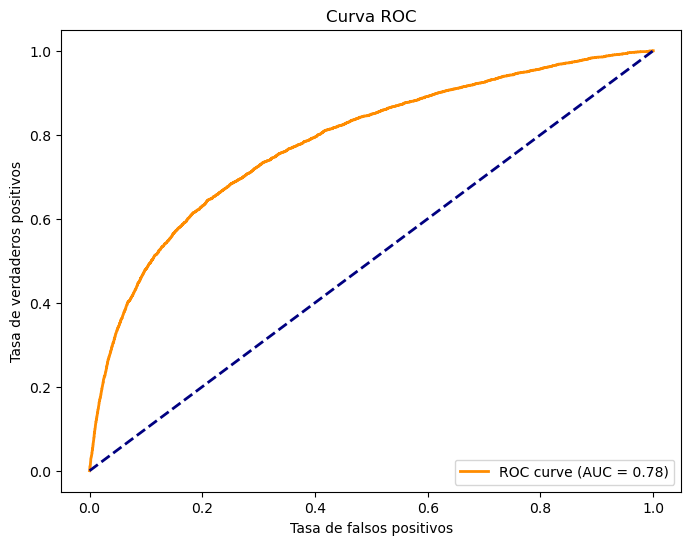

In [36]:
# pbb 
y_prob = model_pipeline.predict_proba(x_test)[:, 1] 

# curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# area bajo la curva 
roc_auc = auc(fpr, tpr)

# graficar 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

A continuacion se realizara lo mismo pero aplicando early stopping.

In [86]:
# variable targety predictora
x = df.drop(columns=['HadHeartAttack'])
y = df[['HadHeartAttack']]

In [90]:
# split del dataset
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [91]:
# columnas categoricas y numericas
categorical_columns = x.select_dtypes(include=['object']).columns
numerical_columns = x.select_dtypes(exclude=['object']).columns

In [92]:
# scaler
scaler = StandardScaler()
x_train[numerical_columns] = scaler.fit_transform(x_train[numerical_columns])
x_test[numerical_columns] = scaler.transform(x_test[numerical_columns])

In [93]:
# encoder
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train[categorical_columns])
x_test_encoded = encoder.transform(x_test[categorical_columns])

In [94]:
# Aseguramos que X_train_encoded y X_val_encoded tengan la forma correcta
X_train_encoded = np.array(x_train_encoded)
X_test_encoded = np.array(x_test_encoded)

In [95]:
# concatenar
x_train_final = np.hstack([x_train[numerical_columns].values, x_train_encoded])
x_test_final = np.hstack([x_test[numerical_columns].values, x_test_encoded])

In [97]:
# modelo
model_mlp = Sequential([
    # capa entrada
    Input(shape=(x_train_final.shape[1],)),  
    # capa oculta 1
    Dense(128, activation='relu'),  
    # dropout de 25% en capa 1 
    Dropout(0.25),  
    # capa oculta 2
    Dense(64, activation='relu'), 
    # dropout 25% capa 2 
    Dropout(0.25), 
    # funcion sigmoide
    Dense(1, activation='sigmoid')  
])

In [98]:
# resumen del modelo
model_mlp.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │        11,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,225 (79.00 KB)

 Trainable params: 20,225 (79.00 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
# compilar el modelo
model_mlp.compile(optimizer=Adam(),
                loss='binary_crossentropy', 
                metrics=['accuracy'])

In [100]:
# early stopping
early_stopping = EarlyStopping(monitor='val_loss',  
                            patience=5,  
                            restore_best_weights=True,  
                            verbose=1)

In [105]:
# entrenar el modelo
history = model_mlp.fit(x_train_final, y_train, 
                        epochs=10, 
                        batch_size=32, 
                        validation_data=(x_test_final, y_test), 
                        callbacks=[early_stopping])

Epoch 1/10
5382/5382 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9487 - loss: 0.1442 - val_accuracy: 0.9415 - val_loss: 0.2661
Epoch 2/10
5382/5382 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9498 - loss: 0.1417 - val_accuracy: 0.9408 - val_loss: 0.3143
Epoch 3/10
5382/5382 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9504 - loss: 0.1414 - val_accuracy: 0.9447 - val_loss: 0.3255
Epoch 4/10
5382/5382 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9500 - loss: 0.1421 - val_accuracy: 0.9400 - val_loss: 0.2969
Epoch 5/10
5382/5382 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9505 - loss: 0.1404 - val_accuracy: 0.9427 - val_loss: 0.3037
Epoch 6/10
5382/5382 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9504 - loss: 0.1436 - val_accuracy: 0.9447 - val_loss: 0.2827
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 1.


In [106]:
# evaluar 
test_loss, test_accuracy = model_mlp.evaluate(x_test_final, y_test)
print(f"Accuracy on test data: {test_accuracy*100:.2f}%")

2307/2307 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9409 - loss: 0.2691
Accuracy on test data: 94.15%


In [107]:
# predecir en el conjunto de prueba
y_pred = model_mlp.predict(x_test_final)

2307/2307 ━━━━━━━━━━━━━━━━━━━━ 2s 726us/step


In [109]:
# Convertir las predicciones continuas a binarias
y_pred_binary = (y_pred > 0.5).astype(int)  

In [110]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred_binary))

Exactitud: 0.9414554175078245
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     69809
           1       0.46      0.47      0.46      3998

    accuracy                           0.94     73807
   macro avg       0.71      0.72      0.72     73807
weighted avg       0.94      0.94      0.94     73807



In [111]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[67618  2191]
 [ 2130  1868]]


In [112]:
# funcion para graficar la matriz de confusion
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Etiqueta predicha')
    plt.show()

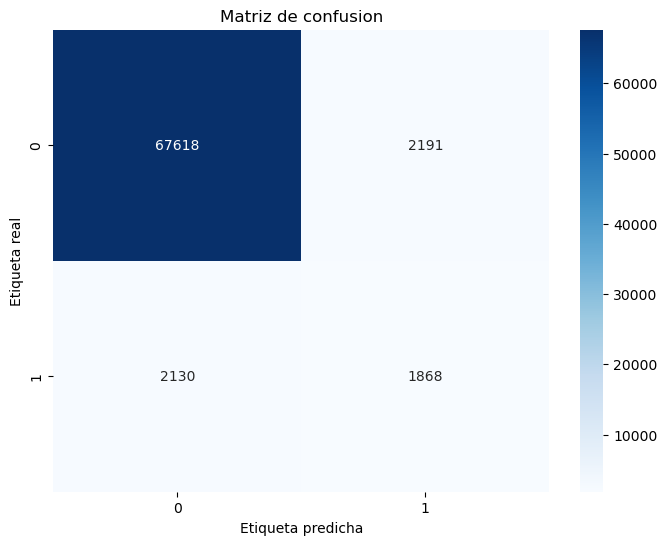

In [113]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion")

2307/2307 ━━━━━━━━━━━━━━━━━━━━ 2s 719us/step


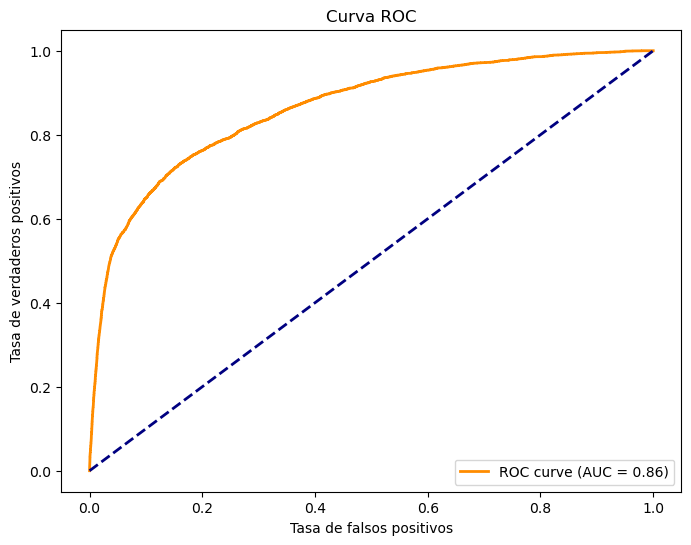

In [115]:
# pbb 
y_pred_prob = model_mlp.predict(x_test_final) 

# curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# area bajo la curva 
roc_auc = auc(fpr, tpr)

# graficar 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Se realizo la prediccion de personas con enfermedades cardiacas basandose en sus respectivas caracteristicas medicas. Inicialmente se aplico un modelo MLP sin early dropout, ese modelo dio buenos resultados ya que se obtuvo una exactitud del 92% segun el classification report, y la curva auc dio un resultado de 0.78. Por otro lado, la matriz de confusion sugiere que 5800 pacientes fueron etiquetados incorrectamente. 

Luego, se aplico el modelo MLP pero con el early stopping activado. Esto mejoro el modelo, con un exactitud del 94%, una mejora significativa respecto a la curva auc con un valor de 0.86 y respecto a la matriz de confusion se obtuvo 4.131 personas etiquetadas incorrectamente. Asi, esto sugiere que utilizando dropout el rendimiento del modelo mejora, y mejoraria aun mas aumentando las epocas.